In [ ]:
walmart dataset columns details

1. The columns are present on the datatypes of integers and objects
2. the total dataframe having the shape of the given dataframe: (550068, 10)
3. there are no null values present in any of the columns 
4. in the columns the dataset which 5% percentile and 95% percentile values  are being clipped 

datatypes of each column
User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object
shape of the given dataframe: (550068, 10)
Total number of NULL values in each column
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


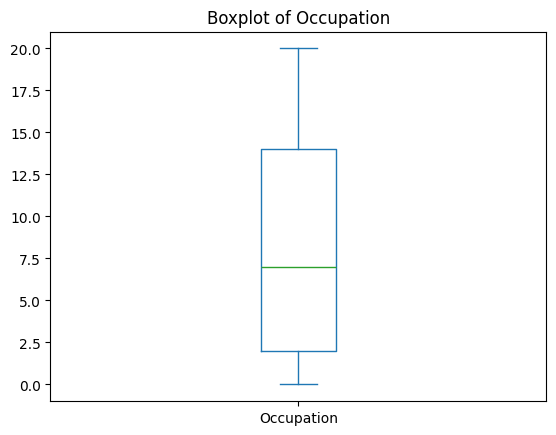

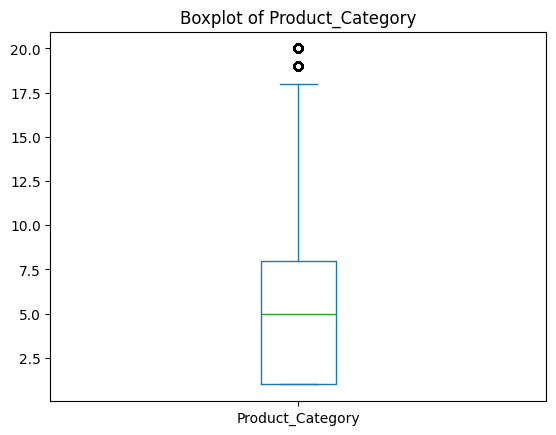

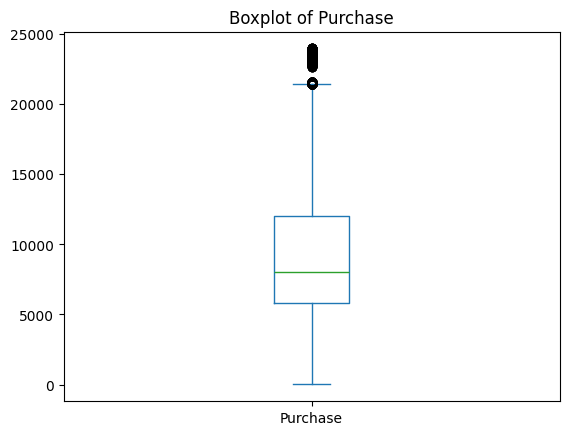

        User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000329  P00069042      F   0-17          10             A   
1       1000329  P00248942      F   0-17          10             A   
2       1000329  P00087842      F   0-17          10             A   
3       1000329  P00085442      F   0-17          10             A   
4       1000329  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1005747  P00372445      M  51-55          13             B   
550064  1005747  P00375436      F  26-35           1             C   
550065  1005747  P00375436      F  26-35          15             B   
550066  1005747  P00375436      F    55+           1             C   
550067  1005747  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2               0                 3      8370  

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


df=pd.read_excel('walmart_data.xlsx')
print("datatypes of each column")
print(df.dtypes)
print("shape of the given dataframe:",df.shape)
print("Total number of NULL values in each column")
print(df.isnull().sum())

for col in ['Occupation', 'Product_Category', 'Purchase']:
    df[col].plot(kind='box')
    plt.title(f'Boxplot of {col}')
    plt.show()
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        q_5= df[col].quantile(0.05)
        q_95=df[col].quantile(0.95)
        df[col]=np.clip(df[col],q_5,q_95)
print(df)

In [ ]:
1.comparing all the clipped data and plotting different data visualization plots like histplot, scatterplot with different columns 
2.plotting the histogram for the product purchased by different age groups most probably the age groups of 26-35 have been purchased more products rather
then other age groups and also comparing the products purchased by gender groups female group probably purchased more than male group
3. plotting the scatterplot on continuous variable columns like Age, purchase, marital status. mostly the age group 46-50, 51-54 on the married people
buy more products than single people

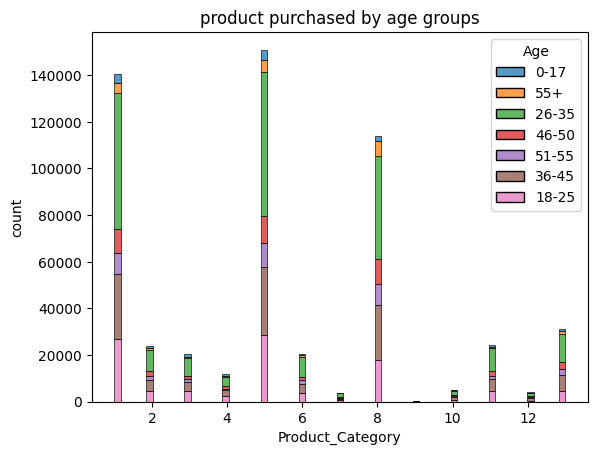

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


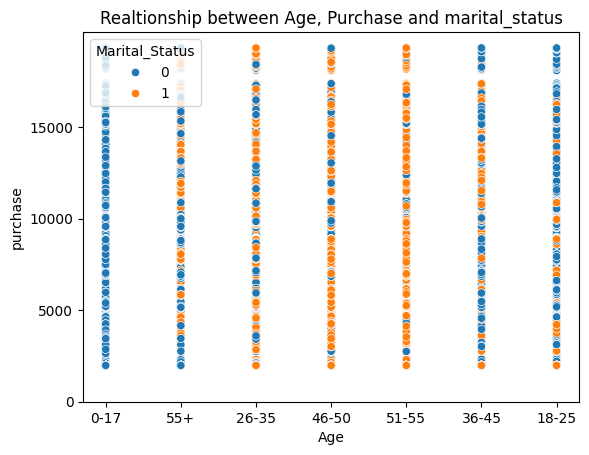

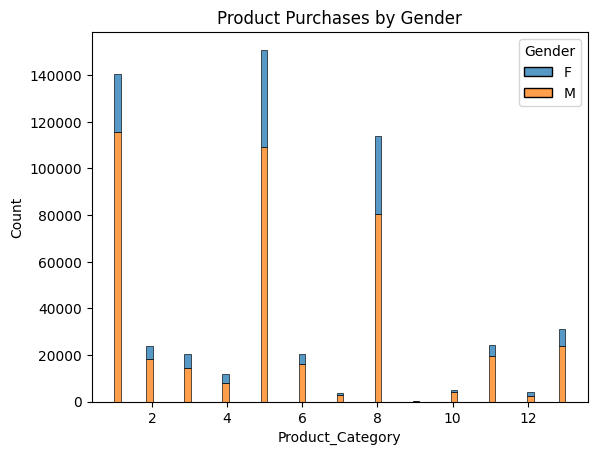

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

df=pd.read_excel('walmart_data.xlsx')
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        q_5= df[col].quantile(0.05)
        q_95=df[col].quantile(0.95)
        df[col]=np.clip(df[col],q_5,q_95)

sns.histplot(data=df, x='Product_Category',hue='Age', multiple='stack')
plt.xlabel('Product_Category')
plt.ylabel('count')
plt.title('product purchased by age groups')
plt.show()

sns.scatterplot(data=df, x='Age', y='Purchase', hue='Marital_Status')
plt.yticks(range(0, 20000,5000))
plt.xlabel('Age')
plt.ylabel('purchase')
plt.title("Realtionship between Age, Purchase and marital_status")
plt.show()

sns.histplot(data=df, x='Product_Category',hue='Gender', multiple='stack')
plt.xlabel('Product_Category')
plt.ylabel('Count')
plt.title('Product Purchases by Gender')
plt.show()

In [ ]:
In this errorplot where 95 % confidence interval was acheived mostly by female gender comparing to male gender. the mean value was more in female rather than male 
male. the standard deviation value difference also more in female

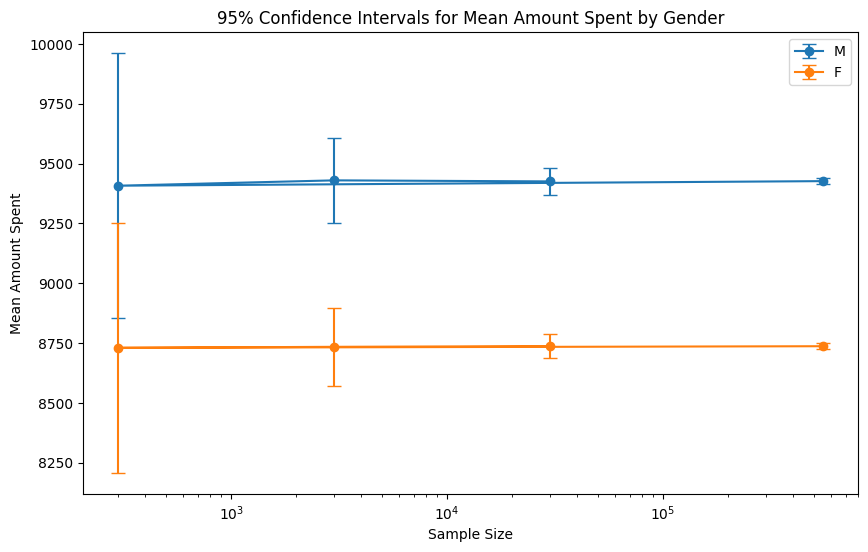

In [12]:
def compute_confidence_interval(data, sample_size):
    means = []
    for _ in range(1000):  # Perform 1000 bootstrapping iterations
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))
    ci_lower = np.percentile(means, 2.5)  # Lower bound of 95% confidence interval
    ci_upper = np.percentile(means, 97.5)  # Upper bound of 95% confidence interval
    return ci_lower, ci_upper



# Compute confidence intervals for different sample sizes
sample_sizes = [len(df), 300, 3000, 30000]
conf_intervals_male = [compute_confidence_interval(df[df['Gender'] == 'M']['Purchase'], size) for size in sample_sizes]
conf_intervals_female = [compute_confidence_interval(df[df['Gender'] == 'F']['Purchase'], size) for size in sample_sizes]

# Plot results
plt.figure(figsize=(10, 6))
plt.errorbar(sample_sizes, [np.mean(ci) for ci in conf_intervals_male], yerr=[(ci[1] - ci[0]) / 2 for ci in conf_intervals_male], label='M', fmt='o-', capsize=5)
plt.errorbar(sample_sizes, [np.mean(ci) for ci in conf_intervals_female], yerr=[(ci[1] - ci[0]) / 2 for ci in conf_intervals_female], label='F', fmt='o-', capsize=5)
plt.xlabel('Sample Size')
plt.ylabel('Mean Amount Spent')
plt.title('95% Confidence Intervals for Mean Amount Spent by Gender')
plt.legend()
plt.xscale('log')
plt.show()

In [ ]:
In this errorplot where 95 % confidence interval was acheived mostly by married status comparing to unmarried status. the mean value was more in married status rather than unmarried 
status. the standard deviation value difference also more in married status

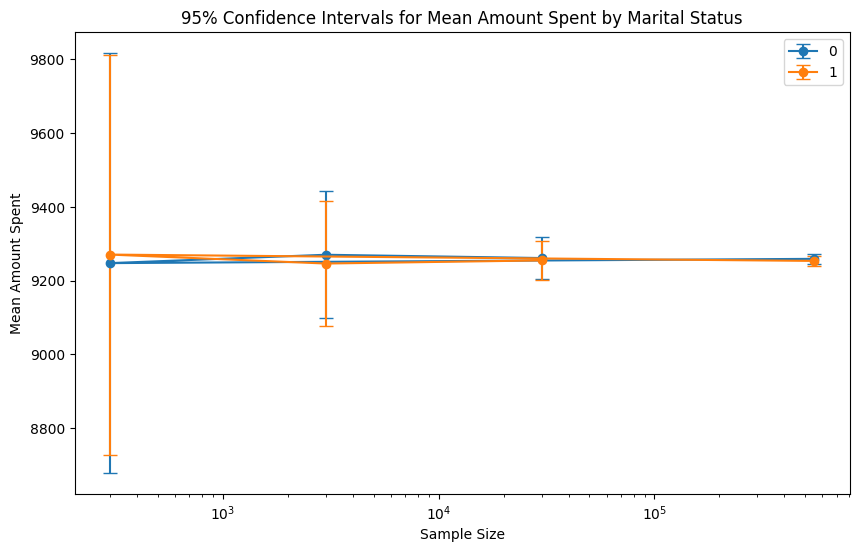

In [13]:
def compute_confidence_interval(data, sample_size):
    means = []
    for _ in range(1000):  # Perform 1000 bootstrapping iterations
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))
    ci_lower = np.percentile(means, 2.5)  # Lower bound of 95% confidence interval
    ci_upper = np.percentile(means, 97.5)  # Upper bound of 95% confidence interval
    return ci_lower, ci_upper

# Compute confidence intervals for different sample sizes
sample_sizes = [len(df), 300, 3000, 30000]
conf_intervals_single = [compute_confidence_interval(df[df['Marital_Status'] == 0]['Purchase'], size) for size in sample_sizes]
conf_intervals_married = [compute_confidence_interval(df[df['Marital_Status'] == 1]['Purchase'], size) for size in sample_sizes]

# Plot results
plt.figure(figsize=(10, 6))
plt.errorbar(sample_sizes, [np.mean(ci) for ci in conf_intervals_single], yerr=[(ci[1] - ci[0]) / 2 for ci in conf_intervals_single], label=0, fmt='o-', capsize=5)
plt.errorbar(sample_sizes, [np.mean(ci) for ci in conf_intervals_married], yerr=[(ci[1] - ci[0]) / 2 for ci in conf_intervals_married], label=1, fmt='o-', capsize=5)
plt.xlabel('Sample Size')
plt.ylabel('Mean Amount Spent')
plt.title('95% Confidence Intervals for Mean Amount Spent by Marital Status')
plt.legend()
plt.xscale('log')
plt.show()

In [ ]:
In this errorplot where 95 % confidence interval was acheived mostly by 45 age group comparing to other age groups . the mean value was more in 45 age group rather than others age group 
status. the standard deviation value difference also more in married status

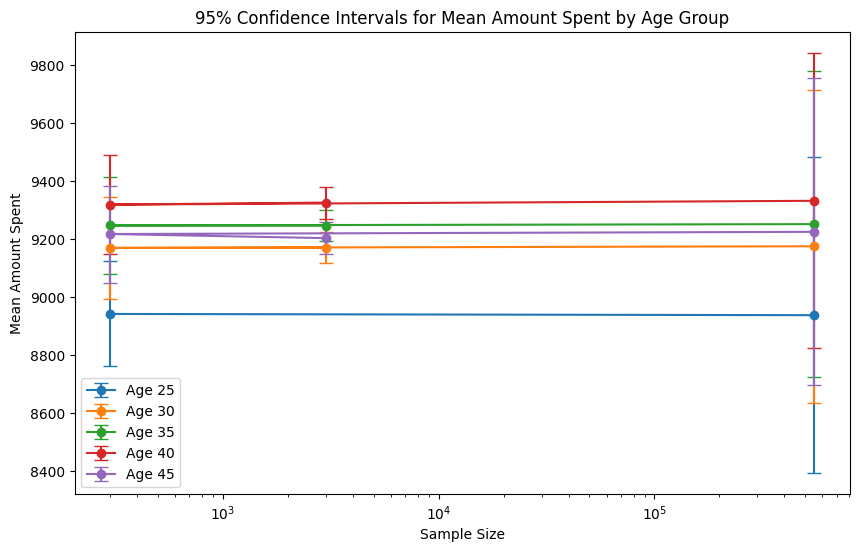

In [14]:
def compute_confidence_interval(data, sample_size):
    means = []
    for _ in range(1000):  # Perform 1000 bootstrapping iterations
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))
    ci_lower = np.percentile(means, 2.5)  # Lower bound of 95% confidence interval
    ci_upper = np.percentile(means, 97.5)  # Upper bound of 95% confidence interval
    return ci_lower, ci_upper

# Compute confidence intervals for different sample sizes
sample_sizes = [len(df), 300, 3000, 30000]
conf_intervals_age25 = [compute_confidence_interval(df[df['Age'] == '0-17']['Purchase'], size) for size in sample_sizes if len(df[df['Age'] == '0-17']) >= size]
conf_intervals_age30 = [compute_confidence_interval(df[df['Age'] == '18-25']['Purchase'], size) for size in sample_sizes if len(df[df['Age'] == '18-25']) >= size]
conf_intervals_age35 = [compute_confidence_interval(df[df['Age'] == '26-35']['Purchase'], size) for size in sample_sizes if len(df[df['Age'] == '26-35']) >= size]
conf_intervals_age40 = [compute_confidence_interval(df[df['Age'] == '36-45']['Purchase'], size) for size in sample_sizes if len(df[df['Age'] == '36-45']) >= size]
conf_intervals_age45 = [compute_confidence_interval(df[df['Age'] == '46-50']['Purchase'], size) for size in sample_sizes if len(df[df['Age'] == '46-50']) >= size]
conf_intervals_age50 = [compute_confidence_interval(df[df['Age'] == '51-55']['Purchase'], size) for size in sample_sizes if len(df[df['Age'] == '51-55']) >= size]
conf_intervals_age55 = [compute_confidence_interval(df[df['Age'] == '55+']['Purchase'], size) for size in sample_sizes if len(df[df['Age'] == '55+']) >= size]

# Plot results
plt.figure(figsize=(10, 6))
if conf_intervals_age25:
    plt.errorbar(sample_sizes[:len(conf_intervals_age25)], [np.mean(ci) for ci in conf_intervals_age25], yerr=[(ci[1] - ci[0]) / 2 for ci in conf_intervals_age25], label='Age 25', fmt='o-', capsize=5)
if conf_intervals_age30:
    plt.errorbar(sample_sizes[:len(conf_intervals_age30)], [np.mean(ci) for ci in conf_intervals_age30], yerr=[(ci[1] - ci[0]) / 2 for ci in conf_intervals_age30], label='Age 30', fmt='o-', capsize=5)
if conf_intervals_age35:
    plt.errorbar(sample_sizes[:len(conf_intervals_age35)], [np.mean(ci) for ci in conf_intervals_age35], yerr=[(ci[1] - ci[0]) / 2 for ci in conf_intervals_age35], label='Age 35', fmt='o-', capsize=5)
if conf_intervals_age40:
    plt.errorbar(sample_sizes[:len(conf_intervals_age40)], [np.mean(ci) for ci in conf_intervals_age40], yerr=[(ci[1] - ci[0]) / 2 for ci in conf_intervals_age40], label='Age 40', fmt='o-', capsize=5)
if conf_intervals_age45:
    plt.errorbar(sample_sizes[:len(conf_intervals_age45)], [np.mean(ci) for ci in conf_intervals_age45], yerr=[(ci[1] - ci[0]) / 2 for ci in conf_intervals_age45], label='Age 45', fmt='o-', capsize=5)

plt.xlabel('Sample Size')
plt.ylabel('Mean Amount Spent')
plt.title('95% Confidence Intervals for Mean Amount Spent by Age Group')
plt.legend()
plt.xscale('log')
plt.show()

In [17]:
def compute_confidence_interval(data):
    
    means = []
    for _ in range(1000):  # Perform 1000 bootstrapping iterations
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    ci_lower = np.percentile(means, 2.5)  # Lower bound of 95% confidence interval
    ci_upper = np.percentile(means, 97.5)  # Upper bound of 95% confidence interval
    return ci_lower, ci_upper

def compare_gender_spending(data, gender_column, spending_column, confidence_level=0.95):
    # Separate data by gender
    male_spending = data[data[gender_column] == 'M'][spending_column]
    female_spending = data[data[gender_column] == 'F'][spending_column]

    # Calculate confidence intervals for males and females
    ci_lower_male, ci_upper_male = compute_confidence_interval(male_spending)
    ci_lower_female, ci_upper_female = compute_confidence_interval(female_spending)

    # Check if confidence intervals overlap
    overlap = ci_upper_male >= ci_lower_female and ci_lower_male <= ci_upper_female

    return overlap

# Example usage:
# Assuming you have a DataFrame named df with 'Gender' and 'Purchase' columns
overlap = compare_gender_spending(df, 'Gender', 'Purchase')
if overlap:
    print("The confidence intervals for average spending by males and females overlap.")
    print("This suggests that there is no significant difference in average spending between males and females.")
    print("Walmart can leverage this conclusion to create marketing campaigns and promotions that target both groups equally.")
else:
    print("The confidence intervals for average spending by males and females do not overlap.")
    print("This suggests that there may be a significant difference in average spending between males and females.")
    print("Walmart can leverage this insight to tailor marketing strategies and promotions to better appeal to each demographic.")

The confidence intervals for average spending by males and females do not overlap.
This suggests that there may be a significant difference in average spending between males and females.
Walmart can leverage this insight to tailor marketing strategies and promotions to better appeal to each demographic.


In [15]:
def compute_confidence_interval(data):
    means = []
    for _ in range(1000):  # Perform 1000 bootstrapping iterations
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    ci_lower = np.percentile(means, 2.5)  # Lower bound of 95% confidence interval
    ci_upper = np.percentile(means, 97.5)  # Upper bound of 95% confidence interval
    return ci_lower, ci_upper


ci_married = compute_confidence_interval(df[df['Marital_Status'] == 1]['Purchase'])
ci_unmarried = compute_confidence_interval(df[df['Marital_Status'] == 0]['Purchase'])


overlap = ci_married[1] >= ci_unmarried[0] and ci_married[0] <= ci_unmarried[1]


if overlap:
    print("The confidence intervals for the average amount spent by married and unmarried individuals overlap.")
    print("This suggests that there is no significant difference in average spending between married and unmarried individuals.")
    print("Walmart can leverage this conclusion to create marketing campaigns and promotions that target both groups equally.")
else:
    print("The confidence intervals for the average amount spent by married and unmarried individuals do not overlap.")
    print("This suggests that there may be a significant difference in average spending between married and unmarried individuals.")
    print("Walmart can leverage this insight to tailor marketing strategies and promotions to better appeal to each demographic.")

The confidence intervals for the average amount spent by married and unmarried individuals overlap.
This suggests that there is no significant difference in average spending between married and unmarried individuals.
Walmart can leverage this conclusion to create marketing campaigns and promotions that target both groups equally.


In [16]:
def compute_confidence_interval(data):
    means = []
    for _ in range(1000):  # Perform 1000 bootstrapping iterations
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    ci_lower = np.percentile(means, 2.5)  # Lower bound of 95% confidence interval
    ci_upper = np.percentile(means, 97.5)  # Upper bound of 95% confidence interval
    return ci_lower, ci_upper

# Calculate confidence intervals for different age groups
age_groups = df['Age'].unique()
conf_intervals = {}
for age_group in age_groups:
    conf_intervals[age_group] = compute_confidence_interval(df[df['Age'] == age_group]['Purchase'])

# Check if confidence intervals overlap
overlap = False
for age_group1 in age_groups:
    for age_group2 in age_groups:
        if age_group1 != age_group2:
            ci1 = conf_intervals[age_group1]
            ci2 = conf_intervals[age_group2]
            if ci1[1] >= ci2[0] and ci1[0] <= ci2[1]:
                overlap = True
                break
    if overlap:
        break

# Provide insights and recommendations
if overlap:
    print("The confidence intervals for the average amount spent by different age groups overlap.")
    print("This suggests that there is no significant difference in average spending between certain age groups.")
    print("Walmart can leverage this conclusion to develop marketing strategies and promotions that target multiple age groups similarly.")
else:
    print("The confidence intervals for the average amount spent by different age groups do not overlap.")
    print("This suggests that there may be significant differences in average spending between age groups.")
    print("Walmart can leverage this insight to tailor marketing strategies and promotions to better appeal to each age group.")

The confidence intervals for the average amount spent by different age groups overlap.
This suggests that there is no significant difference in average spending between certain age groups.
Walmart can leverage this conclusion to develop marketing strategies and promotions that target multiple age groups similarly.


In [ ]:
8.) Recommendations:
1. mostly all the products are purchased with female category comparing with male category so its better to concentrate on more female related products to
   to increase the sales 
2. Also comparing with the age group and marital status mostly the married status couples have purchased more products a=rather than unmarried and the age 
   group 26-31 age group have purchased more and more so its better to concentrate onthis grouped people
3. the product category 5 having more sales rate comparing to other category sales so we should focus on other categories also based on this analysis 
4. The confidence intervals for the average amount spent by different age groups overlap.This suggests that there is no significant difference in 
    average spending between certain age groups
5. The confidence intervals for the average amount spent by married and unmarried individuals overlap. This suggests that there is no 
    significant difference in average spending between married and unmarried individuals.
6. Walmart can leverage this insight to tailor marketing strategies and promotions to better appeal to each demographic

